In [9]:
import numpy as np
import matplotlib.pyplot as plt

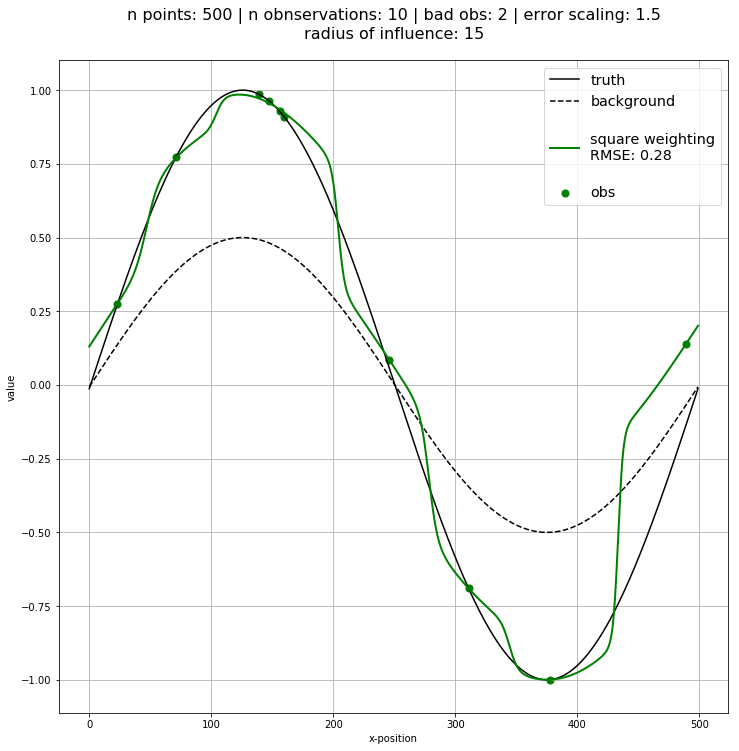

In [18]:
# Radius of influence
R = 15

n_pts = 500
n_obs = 10
n_bad = 2

obs_positions = np.random.choice(n_pts, size=n_obs, replace=False)
obs_positions = obs_positions[np.argsort(obs_positions)]

xt = np.zeros(n_pts)
xb = np.zeros(n_pts)
xa = np.zeros(n_pts)

obs = np.zeros(n_pts)
obs[obs == 0] = np.nan

obs_sign = np.random.choice(obs_positions, size=int(n_bad/2))

obs_big = np.random.choice(
    [i for i in obs_positions if i not in obs_sign], size=int(n_bad/2))

# Generate truth and background
delta_x = 2 * np.pi / (n_pts - 1)

for i in range(n_pts):
    xt[i] = np.sin((i - 1) * delta_x)
    xb[i] = 0.5 * xt[i]

# Make obs
for i in obs_positions:
    obs[i] = xt[i]

# Make some obs incorrect
ob_error = 1.5
obs[obs_sign] *= -1
obs[obs_big] *= ob_error
obs_bad = obs_sign.size + obs_big.size

Rsq = R**2

# Square weighting function
w = np.zeros((n_pts, n_obs))
dx = np.zeros(n_pts)
scalar = np.zeros(n_pts)

for i in range(n_pts):        
    for j, k in enumerate(obs_positions):
        d = abs(k-i)
        dsq = d**2
        w[i, j] = (Rsq - dsq)/(Rsq + dsq) if (Rsq - dsq)/(Rsq+dsq) > 0 else 0            
        dx[i] = dx[i] + (w[i, j] * (obs[k] - xb[k]))
        scalar[i] = scalar[i] + w[i, j]

dx[np.isnan(dx)] = 0
dx[scalar != 0] = dx[scalar != 0]/scalar[scalar != 0]
xa_square = xb + dx
rmse_square = np.sqrt(np.nansum((xa_square - xt)**2)/xa_square.size)

# Exponential weighting function
w = np.zeros((n_pts, n_obs))
dx = np.zeros(n_pts)
scalar = np.zeros(n_pts)

for i in range(n_pts):        
    for j, k in enumerate(obs_positions):
        d = abs(k-i)
        dsq = d**2
        w[i, j] = np.exp(-dsq/(2*Rsq))
        dx[i] = dx[i] + (w[i, j] * (obs[k] - xb[k]))
        scalar[i] = scalar[i] + w[i, j]

dx[np.isnan(dx)] = 0
dx[scalar != 0] = dx[scalar != 0]/scalar[scalar != 0]
xa_square = xb + dx
rmse_exp = np.sqrt(np.nansum((xa_square - xt)**2)/xa_square.size)

plt.figure(figsize=(12, 12))
plt.plot(xt, 'k-', label='truth')
plt.plot(xb, 'k--', label='background')
plt.plot(xa_square, 'g-', linewidth=2, label='\nsquare weighting\nRMSE: %.2f\n'%rmse_square)
# plt.plot(xa_exp, '-', c='orange', linewidth=2, label='\nexponential weighting\nRMSE: %.2f\n'%rmse_exp)
plt.scatter(range(n_pts), obs, c='g', s=50, label='obs')

plt.title('n points: %d | n obnservations: %d | bad obs: %d | error scaling: %.1f\nradius of influence: %d\n'%(
    n_pts, n_obs, obs_bad, ob_error, R), fontsize=16)
plt.xlabel('x-position')
plt.ylabel('value')

plt.legend(fontsize='x-large')
plt.grid()
plt.show()

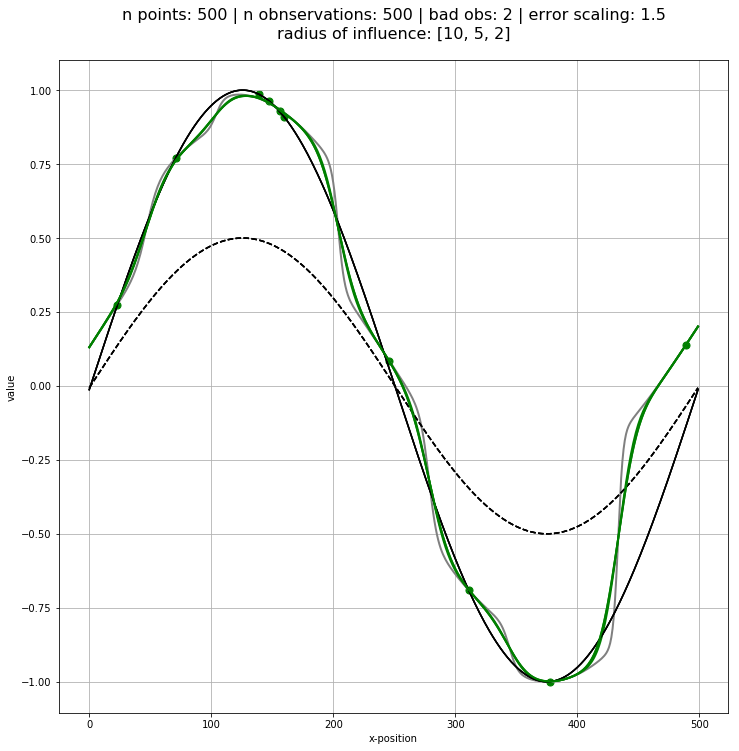

In [19]:
# Radius of influence
plt.figure(figsize=(12, 12))
plt.scatter(range(n_pts), obs, c='g', s=50, label='obs')
plt.plot(xa_square, color='gray', linewidth=2, label='\nexponential weighting\nRMSE: %.2f\n'%rmse_square)
obs_init = obs
pos_init = obs_positions

Rs = [10, 5, 2]
for R in Rs:

    # Make obs from analysis
    obs = xa_square
    obs[pos_init] = obs_init[pos_init]
    obs_positions = np.arange(obs.size)

    Rsq = R**2

    # Square weighting function
    w = np.zeros((n_pts, obs.size))
    dx = np.zeros(n_pts)
    scalar = np.zeros(n_pts)

    for i in range(n_pts):        
        for j, k in enumerate(obs_positions):
            d = abs(k-i)
            dsq = d**2
            w[i, j] = (Rsq - dsq)/(Rsq + dsq) if (Rsq - dsq)/(Rsq+dsq) > 0 else 0            
            dx[i] = dx[i] + (w[i, j] * (obs[k] - xb[k]))
            scalar[i] = scalar[i] + w[i, j]

    dx[np.isnan(dx)] = 0
    dx[scalar != 0] = dx[scalar != 0]/scalar[scalar != 0]
    xa_square = xb + dx
    rmse_square = np.sqrt(np.nansum((xa_square - xt)**2)/xa_square.size)

    # Exponential weighting function
    w = np.zeros((n_pts, obs.size))
    dx = np.zeros(n_pts)
    scalar = np.zeros(n_pts)

    for i in range(n_pts):        
        for j, k in enumerate(obs_positions):
            d = abs(k-i)
            dsq = d**2
            w[i, j] = np.exp(-dsq/(2*Rsq))
            dx[i] = dx[i] + (w[i, j] * (obs[k] - xb[k]))
            scalar[i] = scalar[i] + w[i, j]

    dx[np.isnan(dx)] = 0
    dx[scalar != 0] = dx[scalar != 0]/scalar[scalar != 0]
    xa_square = xb + dx
    rmse_exp = np.sqrt(np.nansum((xa_square - xt)**2)/xa_square.size)

    plt.plot(xt, 'k-', label='truth')
    plt.plot(xb, 'k--', label='background')
    plt.plot(xa_square, 'g-', linewidth=2, label='\nsquare weighting\nRMSE: %.2f\n'%rmse_square)
#     plt.plot(xa_exp, '-', c='orange', linewidth=2, label='\nexponential weighting\nRMSE: %.2f\n'%rmse_exp)

plt.title('n points: %d | n obnservations: %d | bad obs: %d | error scaling: %.1f\nradius of influence: %s\n'%(
    n_pts, obs.size, obs_bad, ob_error, Rs), fontsize=16)
plt.xlabel('x-position')
plt.ylabel('value')

# plt.legend(fontsize='x-large')
plt.grid()
plt.show()